# Make a character network from a text


In [1]:
import nbtext as nb
from nbtext import Corpus
%matplotlib inline

In [2]:
def check_navn(navn, limit=2, remove='Ja Nei Unnskyld Ikke Ah Hmm Hm'.split()):
    """Removes all items in navn with frequency below limit and words in all case as well as all words in list 'remove'"""
    r = {x:navn[x] for x in navn if navn[x] > limit and x.upper() != x and not x in remove}
    return r

def check_edges(G, weight=1):
    import networkx as nx
    
    return nx.Graph([edge for edge in G.edges(data=True) if edge[2]['weight'] >= weight])


# Select a list of books

Add metadata in order to select a book.


In [3]:
bøker = nb.get_urn({'title':'pan%', 'author':"ham%", 'trans':'', 'year':1800, 'next':250, 'limit':130})

bøker

[[2008010200016, 'Hamsun, Knut', 'Pan', 1994],
 [2016060348116, 'Hamsun, Knut', 'Pan', 1974],
 [2008121004041, 'Hamsun, Knut', 'Pan', 1968],
 [2009082000088, 'Hamsun, Knut', 'Pan ; Schwärmer ; die Nachbarstadt', 1990],
 [2011112108059, 'Hamsun, Knut', 'Pan', 1954],
 [2013082106004, 'Hamsun, Knut', 'Pan', 1937],
 [2016053048123, 'Hamsun, Knut', 'Pan', 1919],
 [2008080500012, 'Hamsun, Knut', 'Pan', 1961],
 [2008020804093, 'Hamsun, Knut', 'Pan', 1994],
 [2011112308061, 'Hamsun, Knut', 'Pan', 1954],
 [2008082710002, 'Hamsun, Knut', 'Pan', 1894],
 [2008020604049, 'Hamsun, Knut', 'Pan', 1994],
 [2013031906016, 'Hamsun, Knut', 'Pan', 2009],
 [2014110508116, 'Hamsun, Knut', 'Pan', 2002],
 [2008082701033, 'Hamsun, Knut', 'Pan', 1998],
 [2008051404107, 'Hamsun, Knut', 'Pan', 1954]]

### Assign a select book to variable 'book'

In [13]:
book = [2014110508116, 'Hamsun, Knut', 'Pan', 2002]

Compute the candidates for characters - anything starting with a capital letter that could be a person name or place name. Print the topmost elements.

In [14]:
book_names_raw = nb.navn(book)
print('Number of objects === ', len(list(book_names_raw)), '\nSome examples ======= ', list(book_names_raw)[:20])

Number of objects ===  62 
Some examples =======  ['AIT', 'AS', 'Aha', 'Ak', 'Carl', 'Cora', 'De', 'Dem', 'Deres', 'Diderik', 'Dundas', 'Eder', 'Eders', 'Edvarda', 'Edvardas', 'Eva', 'Glahn', 'Glahns', 'Goddag', 'Gud']


### Edit names, remove some words

Rerun from here and change parameters

In [15]:
book_names = check_navn(book_names_raw, 5)
print([x for x in book_names])

['De', 'Dem', 'Deres', 'Diderik', 'Eder', 'Edvarda', 'Edvardas', 'Eva', 'Glahn', 'Glahns', 'Gud', 'Guds', 'Iselin', 'Jaså', 'Mack', 'Macks', 'Maggie', 'Pause', 'Sirilund', 'Thomas', 'Æsop']


## Create the network

In [16]:
network_raw = nb.make_network(book, book_names)

Remove edges with a weight (usually number of connections) less than weight.

In [24]:
network = check_edges(network_raw, weight=2)

In [25]:
nb.central_betweenness_characters(network, n=20)

[('De', 0.2578781512605042),
 ('Glahn', 0.1695903361344538),
 ('Edvarda', 0.1267156862745098),
 ('Eva', 0.06596638655462186),
 ('Gud', 0.03965336134453782),
 ('Mack', 0.0386904761904762),
 ('Dem', 0.036221988795518203),
 ('Deres', 0.027766106442577033),
 ('Maggie', 0.021586134453781516),
 ('Æsop', 0.004901960784313725),
 ('Glahns', 0.003676470588235294),
 ('Edvardas', 0.0014705882352941176),
 ('Guds', 0.0),
 ('Sirilund', 0.0),
 ('Macks', 0.0),
 ('Thomas', 0.0),
 ('Diderik', 0.0),
 ('Iselin', 0.0)]

True

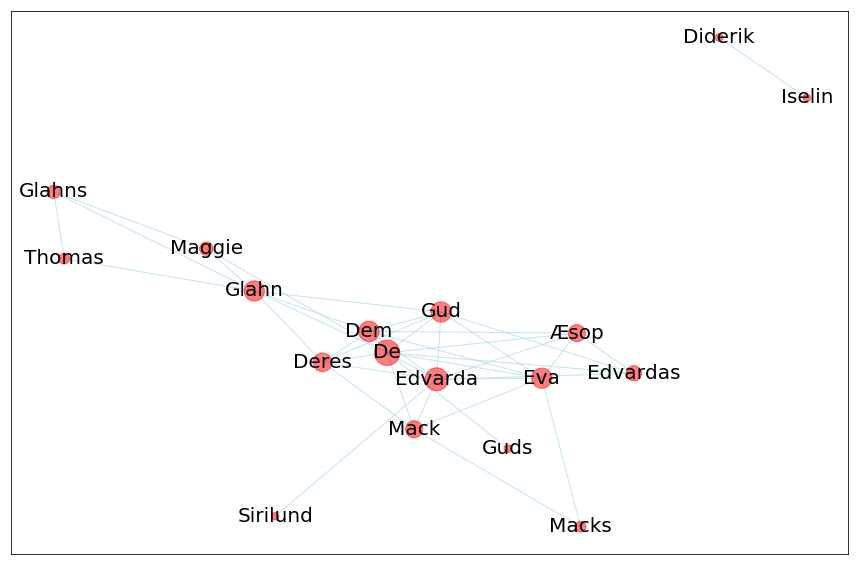

In [27]:
nb.draw_graph_centrality(network, k=0.8)

In [22]:
network.edges(data=True)

EdgeDataView([('De', 'Dem', {'weight': 145.0}), ('De', 'Deres', {'weight': 68.0}), ('De', 'Edvarda', {'weight': 56.0}), ('De', 'Eva', {'weight': 5.0}), ('De', 'Glahn', {'weight': 21.0}), ('De', 'Gud', {'weight': 19.0}), ('De', 'Guds', {'weight': 9.0}), ('De', 'Mack', {'weight': 17.0}), ('Dem', 'Deres', {'weight': 25.0}), ('Dem', 'Edvarda', {'weight': 12.0}), ('Dem', 'Glahn', {'weight': 11.0}), ('Dem', 'Gud', {'weight': 11.0}), ('Deres', 'Edvarda', {'weight': 8.0}), ('Edvarda', 'Edvardas', {'weight': 9.0}), ('Edvarda', 'Gud', {'weight': 5.0}), ('Edvarda', 'Æsop', {'weight': 5.0}), ('Eva', 'Gud', {'weight': 6.0}), ('Eva', 'Mack', {'weight': 5.0}), ('Eva', 'Æsop', {'weight': 21.0}), ('Glahn', 'Gud', {'weight': 6.0}), ('Glahn', 'Maggie', {'weight': 23.0}), ('Glahn', 'Thomas', {'weight': 11.0}), ('Diderik', 'Iselin', {'weight': 5.0})])